# Popular Data Science Questions

In this project, we're going to explore the Data Science Stack Exchange (DSSE) and answer popular data science questions that may arise on the job. The Data Science Stack Exchange is part of Stack Exchange which is a network of question-and-answer websites on topics in diverse fields. All the websites in the network are modeled after the initial site which is very popular among the programming community; Stack Overflow.

We're tasked with finding out "what is the best kind of content to write about". To answer this question, we're going to use the Data Science Stack Exchange's database which is a provided public data base from Stack Exchange. The following columns from the database will be useful for our analysis;

- Id: identification number for a post
- PostTypeId: identification number for the type of post
- Score: a posts score
- ViewCount: how many times a post has been viewed
- Tags: topics that the post is related to
- AnswerCount: how many times a post/question was answered
- FavoriteCount: how many times a post/question was favored
- CreationDate: date and time a post was created

# Import pandas, matplotlib, and seaborn

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read csv into DataFrame

In [201]:
file = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

# Explore the dataset

In [202]:
# view all columns in dataset
file.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'Tags', 'AnswerCount',
       'FavoriteCount'],
      dtype='object')

In [203]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [204]:
file.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Above we can see that there is 7,432 null values in the FavoriteCount column. We will fill all the missing values in the FavoriteCount column with 0 as well as convert the entire row to integers.

# Fill missing values and convert columns

In [205]:
# fill NaN values in FavoriteCount column
file.fillna(value={'FavoriteCount': 0}, inplace=True)
# convert FavoriteCount to type int
file['FavoriteCount'] = file['FavoriteCount'].astype(int)

In [206]:
file.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

# Tags column

There is a post on DSSE about how to correctly tag a question, the link to the post is ;

https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879

Within the very detailed answer, we find out that;

"You are limited to five tags, and you are generally better off trying to use as many of them as you can, provided they follow the guidelines here."

Because of the limitation, we'll create 5 columns in the dataset labeled; tag1,tag2,tag3,tag4, and tag5 which will make the tags easier to work with. The tags are also seperated by < tag > so we'll pass a regular expression into str.replace which will clean this up by replacing them with an empty string.

In [207]:
file['Tags'].head(3)

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
Name: Tags, dtype: object

In [208]:
file["Tags"] = file["Tags"].str.replace("^<|>$", "").str.split("><")

In [209]:
file.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
3987,61170,2019-10-03 01:56:22,0,16,"[scikit-learn, data-cleaning, xgboost]",0,0
6326,53096,2019-06-02 18:18:01,0,34,"[decision-trees, reinforcement-learning, optim...",0,0
2231,46424,2019-02-28 21:13:59,0,32,"[time-series, predictive-modeling, random-fore...",0,0


# Exploring counts for Tags

In [210]:
# create a dictonary to count each tag
tag_count = dict()

for tags in file['Tags']:
        for v in tags:
            if v in tag_count:
                tag_count[v] += 1
            else:
                tag_count[v] = 1

To make things more visually appealing, we'll transform tag_count dictonary into a DataFrame.

In [211]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)

In [212]:
tag_count.head(10)

,Count
yolo,21
matrix-factorisation,24
tools,8
cnn,489
auc,3
automatic-summarization,10
bayesian-nonparametric,2
dataframe,81
audio-recognition,25
image-segmentation,3


In [213]:
# lets sort the DataFrame by Count using .tail(20) to display the top 20 used tags
most_used = tag_count.sort_values(by='Count').tail(20)

In [214]:
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


# Visualizing Most Used

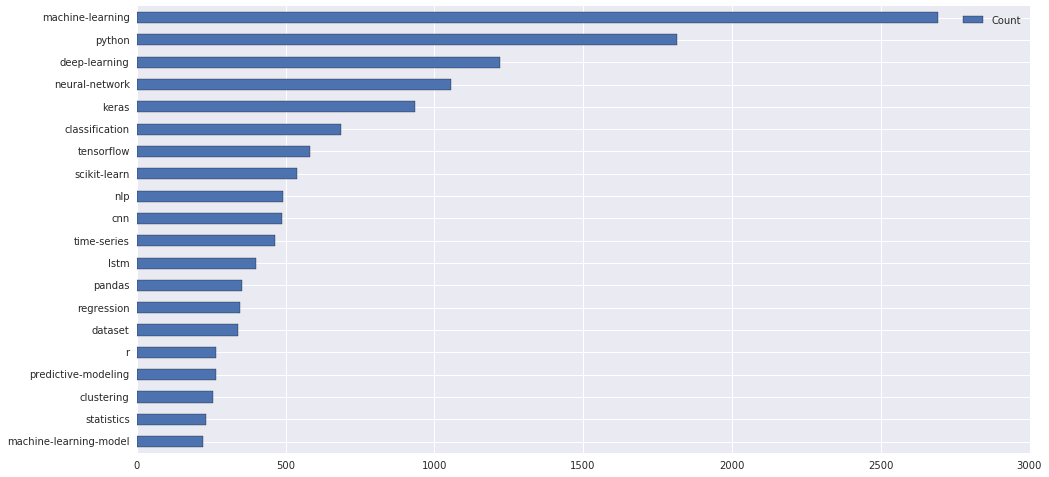

In [215]:
most_used.plot(kind='barh', figsize=(16,8))

The horizontal bar graph above shows us the most used tag is machine-learning and by a large margin. The second and third most used tags are python and deep-learning. A lot of these tags are also very broad, but before we dive deeper into most used lets do the same for most viewed.

# Exploring views for Tags

In [217]:
# create a dictonary for tag view counts
tag_view_count = dict()

for index, row in file.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] + row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

In [218]:
# convert dict to DataFrame and rename column
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'ViewCount'}, inplace=True)

In [219]:
# create most_viewed sorted by top 20
most_viewed = tag_view_count.sort_values(by='ViewCount').tail(20)

# Visualizing most viewed

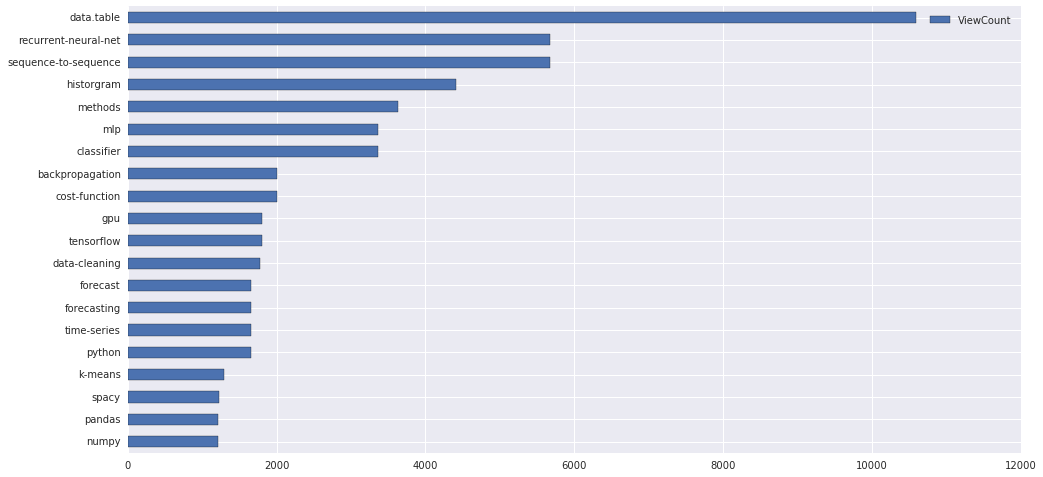

In [220]:
most_viewed.plot(kind='barh', figsize=(16,8))

# Most used and most viewed side-by-side

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf37bb1d30>],
      dtype=object)

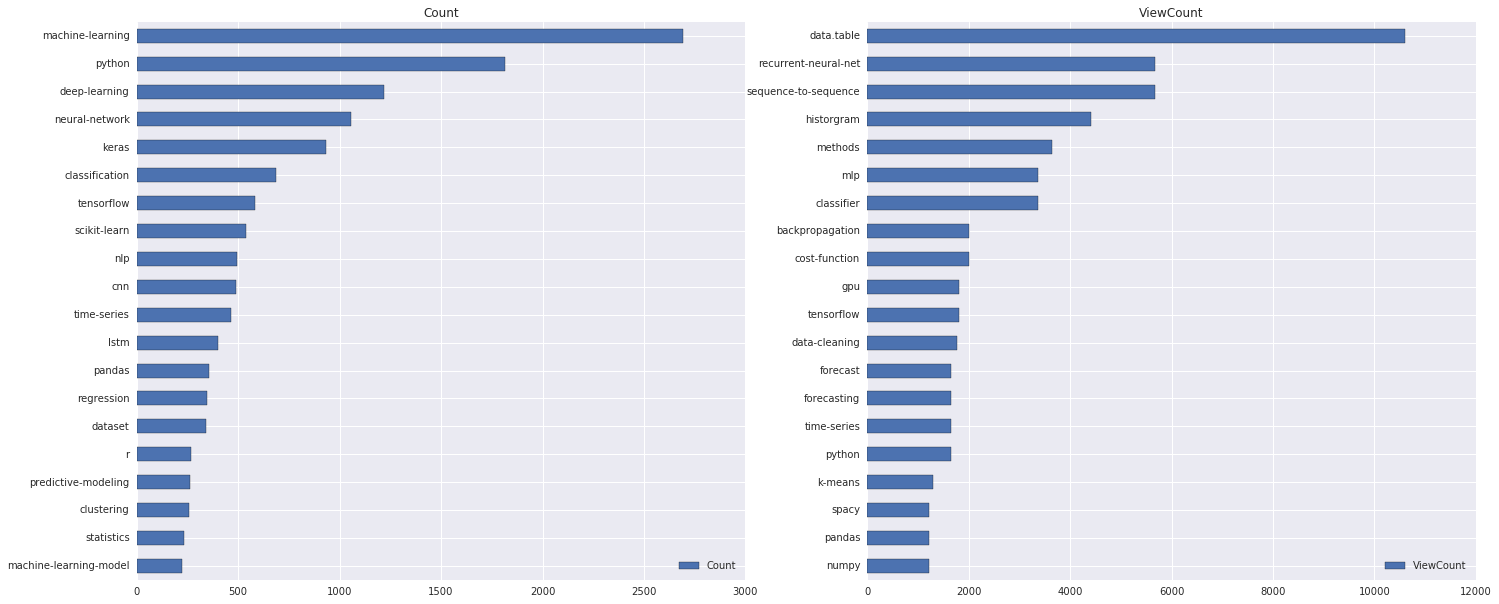

In [221]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

# Relations between Tags

Next we're going to dig into the relationships between tags. First we're going to see which tags are in most_used but not in most_viewed by using pd.merge, and vice versa.

In [224]:
pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,NaN
predictive-modeling,265,NaN
r,268,NaN
dataset,340,NaN
regression,347,NaN
pandas,354,1212.0
lstm,402,NaN
time-series,466,1651.0


In [225]:
pd.merge(most_viewed, most_used, how='left',left_index=True,right_index=True)

,ViewCount,Count
numpy,1212,NaN
pandas,1212,354.0
spacy,1219,NaN
k-means,1289,NaN
python,1651,1814.0
time-series,1651,466.0
forecasting,1651,NaN
forecast,1651,NaN
data-cleaning,1779,NaN
tensorflow,1810,584.0


The following tags are present IN most_used and NOT present in most_viewed;

- machine-learning-model
- statistics
- predictive-modeling
- r

The following tags are present IN most_viewed and NOT present in most_used;

- csv
- pytorch
- dataframe

You may have noticed some tags are related like python with numpy, pandas, data-cleaning etc. One way we can see the relations between tags is finding out how many times tags are paired together in posts.

# Tag Pairs 

In [226]:
all_tags = list(tag_count.index)

In [227]:
pairs = pd.DataFrame(index=all_tags, columns=all_tags)

In [240]:
pairs.head(3)

,yolo,matrix-factorisation,tools,cnn,auc,automatic-summarization,bayesian-nonparametric,dataframe,audio-recognition,image-segmentation,...,adaboost,probability,exploitation,cross-validation,dummy-variables,ensemble-modeling,transformer,tokenization,linear-regression,sequential-pattern-mining
yolo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matrix-factorisation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll fill the pairs dataframe with 0 values, and for each time a tag appears in the file we'll increment the tag by one. In the end we'll have a dataframe that tells us how many times pairs were used.

In [242]:
# fill NaN with zeros
pairs.fillna(0, inplace=True)

In [243]:
for v in file['Tags']:
    pairs.loc[v, v] +=1

In [248]:
most_used_relations = pairs.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: green"
    helper_df.loc["r", "time-series"] = "background-color: green"
    
    return helper_df

most_used_relations.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


If you're viewing this notebook on github the cells most likely do not carry over different color fonts and highlighting. The time-series row and r column is highlighted in green representing that the two tags have been used together 22 times.

Because large DataFrames like this are hard to read, we can use the seaborn library that we imported at the start to create a heatmap of the DataFrame.

# Most_used_relations heatmap

In [251]:
for i in range(most_used_relations.shape[0]):
    most_used_relations.iloc[i,i] = pd.np.NaN

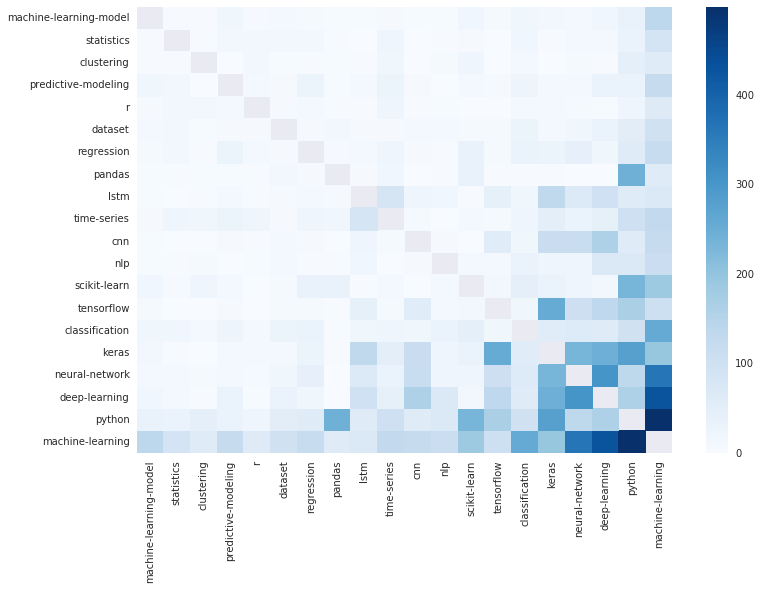

In [252]:
plt.figure(figsize=(12,8))
sns.heatmap(most_used_relations, cmap='Blues', annot=False)

The heatmap above helps us see visually which tags have a strong relationship, the darker the blue the stronger the relationship. Although we can see strong relationships based on this heatmap, for example, python and machine-learning - this can be because these two topics go hand and hand. There is a high chance that someone who is building a machine-learning program is doing so in python, the same can be said with machine-learning and deep-learning or neural-network.

# Is deep-learning just a fad ?

We're now going to determine if deep learning is just a fad, the end result will be a graph showing us the rate at which deep-learning questions were asked over time since the start of the Data Science Stack Exchange.  

In [253]:
# read file 'all_questions.csv' into a DataFrame and 
# use the same regular expression as before to clean up the tags

file1 = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [254]:
file1['Tags'] = file1['Tags'].str.replace('^<|>$', '').str.split('><')

Next we're going to create a function that will filter through all tags and only keep the tags that are associated with deep learning. After creating the function we'll cast it on file1 and store the results in a new column in our dataframe called 'DeepLearning'.

In [255]:
def deep_learning(tags):
    for v in tags:
        if v in ["lstm", "cnn", "scikit-learn", "tensorflow","keras", 
                 "neural-network", "deep-learning"]:
            return 1
    return 0

In [256]:
file1['DeepLearning'] = file1['Tags'].apply(deep_learning)

In [257]:
file1.head(5)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Since there is not enough data from 2020 we'll get rid of any CreationDate's after 2019 using datetime.

In [258]:
file1 = file1[file1['CreationDate'].dt.year < 2020]

In [260]:
# creating a function that returns which quarter of the year a post was created
def which_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) +1)
    return '{y}Q{q}'.format(y=year, q=quarter)

In [261]:
# create Quarter column in which to store our functions results
file1['Quarter'] = file1['CreationDate'].apply(which_quarter)

In [262]:
file1.head(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


# Group by quarter

In [264]:
quraterly = file1.groupby('Quarter').agg

quarterly = file1.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)

In [265]:
quarterly.head(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592


# Visualizing Deep Learning questions by quarter

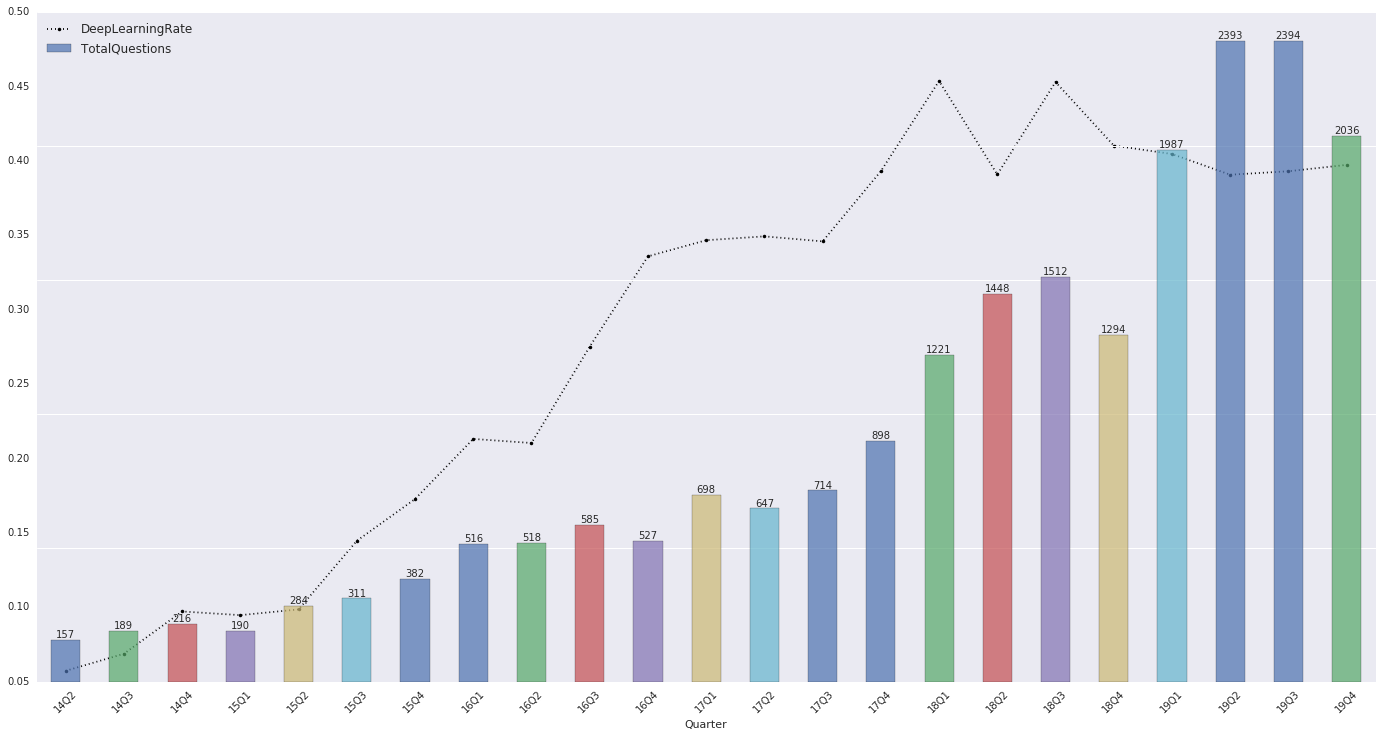

In [272]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="dotted", marker=".", color="black",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

There has been massive growth since the start of DSSE involving questions asked about deep-learning topics. Although there has been continued growth we can see a possible ceiling towards the end of the graph. Deep learning and AI is still a relativly new field despite major strides by the human race dating back almost two decades now that we're in the year 2021. I believe the rate will upswing once again as deep learning specialists uncover new ideas and topics. As with anything, the more that people learn about a specefic topic the easier it can be to use as specialists and experts lay down easier to digest learning techniques on complex topics. A good example is the change in programming languages over the years, back in the day they were clunky, buggy,  and hard to use. C did not release until 1972, SQL until 1978 and of course python with its first release in 1990. All of these languages have come so far and now languages like python are basically read as English. Deep-learning will continue to grow; the more that we uncover about it, and the easier it becomes to use, the more curious people will become.